# Logistic Regression

You will implement logistic regression classifier.

Iris dataset with only 2 classes is provided to test the code.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("shuffled_2class_iris_dataset.csv")
print(df.head())

df = df.values
X = df[:,0:4]   # 100x4
y = df[:,4]     # 100x1


   sepal_width  sepal_length  petal_width  petal_length  class
0          5.6           3.0          4.1           1.3      0
1          5.4           3.9          1.7           0.4      1
2          5.6           3.0          4.5           1.5      0
3          5.0           3.5          1.6           0.6      1
4          5.5           2.4          3.7           1.0      0


In [3]:
# Zero out the mean
diff = X.max(0) - X.min(0)
X = X - diff

# Create 90/10 trainig/test sets
train_data = X[0:90,0:4]; train_label = y[0:90]
test_data = X[90:100,0:4]; test_label = y[90:100]

zz = np.ones((len(test_data),1))
test_data = np.concatenate((zz,test_data), axis=1)  # 90x5

np.random.seed(1)

### Training

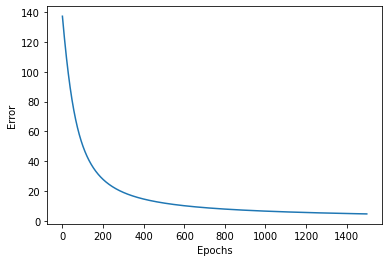

In [4]:
# Train the model using the training data

# Use batch gradient descent to find the optimal weights of the sigmoid function
# Experiment with different learning rates
# Run it for 1500 iterations.  You may change the number of iterations as you see fit.

# Initialization
nu = 0.01
MAX_EPOCHS = 1500
J_vec = []

# The rest of initialization ...

zz = np.ones((len(train_data),1))
X_train = np.concatenate((zz,train_data), axis=1)  # 90x5
y_train = train_label.reshape(len(train_label),1)  # 90x1
#print ('Xshape=', X.shape, 'yshape=', y.shape)
w = np.random.rand(5,1)
w0 = w[0]; w1 = w[1]; w2 = w[2]; w3 = w[3]; w4 = w[4]
N = len(y_train)

# Loop for 1500 epochs
for itr in range (0, MAX_EPOCHS):

    # TO DO: write the update equation
    #   X_train is 90x5; the first column is all 1's
    #     1st feature of the first observation: X_train[0,1]
    #     4th feature of the second observation: X_train[1,4]
    #   y_train is 90x1
    #     the label of the first observation: y_train[0]
    #     the label of the seventh observation: y_train[6]
    #
    #  You may want to use np.exp and np.log in your computation

    sum0 = 0; sum1 = 0; sum2 = 0; sum3 = 0; sum4 = 0
    for i in range (0, N):
      sigmd = 1/(1+np.exp(-(w0*X_train[i,0] + w1*X_train[i,1] + w2*X_train[i,2] + w3*X_train[i,3] + w4*X_train[i,4])))
      sum0 = sum0 + ((sigmd - y_train[i]) * X_train[i,0])
      ## your code goes here ...
      sum1 = sum1 + ((sigmd - y_train[i]) * X_train[i,1])
      sum2 = sum2 + ((sigmd - y_train[i]) * X_train[i,2])
      sum3 = sum3 + ((sigmd - y_train[i]) * X_train[i,3])
      sum4 = sum4 + ((sigmd - y_train[i]) * X_train[i,4])
  

    temp0 = w0 - nu * (sum0/N)
    ## your code goes here ...
    temp1 = w1 - nu * (sum1/N)
    temp2 = w2 - nu * (sum2/N)
    temp3 = w3 - nu * (sum3/N)
    temp4 = w4 - nu * (sum4/N)


    w0 = temp0; 
    ## your code goes here ...
    w1 = temp1;
    w2 = temp2;
    w3 = temp3;
    w4 = temp4;

    # Compute cost function J
    J = 0
    for i in range(0, N):
      sigmd = 1/(1+np.exp(-(w0*X_train[i,0] + w1*X_train[i,1] + w2*X_train[i,2] + w3*X_train[i,3] + w4*X_train[i,4])))
      J = J - (y_train[i]*np.log(sigmd) + (1-y_train[i])*np.log(1-sigmd))
  
    ## Collect the cost function result from each epoch to generate a plot
    J_vec.append(J)   # 1500x1
    
  
# Plot cost function vs iterations
plt.plot(J_vec)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

### Testing

In [5]:
# Now use the test set to test the model

# Print the actual and predicted class labels
# Print the average accuracy

correct_class_cnt = 0
for i in range (0, len(test_data)):
    
    # TO DO: 
    # Compute the sigmoid function for each test data and optimal weights
    # Find the predicted label y_hat based on threshold = 0.5
    # 
    # test_data = 10x5, the first column is all 1's
    #   1st feature of the first observation: test_data[0,1]
    #   4th feature of the second observation: test_data[1,4]
    #
    #   test_label is 10x1
    #   the label of the first observation: test_label[0]
    #   the label of the seventh observation: test_label[6]

    z = w0*test_data[i][0] + w1*test_data[i][1] + w2*test_data[i][2] + w3*test_data[i][3] + w4*test_data[i][4]
     
    # Generate predicted label y_hat based on threshold = 0.5
    ## your code goes here ...
    y_hat = 1/(1+np.exp(-(z)))
    
    if(y_hat >= 0.5):
      y_hat = 1
    else:
      y_hat = 0

        
    ### Check accuracy
    print('y={}, y_hat={}'.format(test_label[i], y_hat))
    if (y_hat == test_label[i]):
        correct_class_cnt += 1

print('Average accuracy = {0:2f}'.format(correct_class_cnt/10))


y=1.0, y_hat=1
y=1.0, y_hat=1
y=0.0, y_hat=0
y=1.0, y_hat=1
y=0.0, y_hat=0
y=1.0, y_hat=1
y=0.0, y_hat=0
y=0.0, y_hat=0
y=0.0, y_hat=0
y=1.0, y_hat=1
Average accuracy = 1.000000


Caution: accuracy may change drastically because of overfitting (data set too small)

In [6]:
# Print the optimal weights
print(w0, w1, w2, w3, w4)

[-0.02096917] [-1.14439579] [0.51801623] [-1.7863614] [-0.49312488]
